# Question 1 - MLP Regressor 
In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python; http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

The following code will pre-process the data and split the data into training and test sets using train_test_split with random state 30 and test_size = 0.25.

The dataset is loaded from q2_data.csv which contains features of engine and the predictor varialble is "mpg". The features are:
* cylinders 
* displacement
* horsepower
* weight
* acceleration

In [1]:
#!pip install -U scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline


df = pd.read_csv('q2_data.csv') 
df.dropna(inplace=True)
df.columns
y = df['mpg'].values
X = df.drop(['mpg'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 5) (294,) (98, 5) (98,)


In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


In [3]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.


   
1) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)*

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
    
   Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


2) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)* 

   
3) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size. 

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)
   
   Plot three different figures for the three batch size, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*: 

   (a) *batch_size = 1* 
   
   (b) *batch_size = 20*  
   
   (c) *batch_size = 2000* 
     
   **Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.**

# Answer 1

In [4]:
reg_a= MLPRegressor(hidden_layer_sizes=(5,),activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005).fit(X_train,y_train)
predicted_a=reg_a.predict(X_test)
print("5 hidden units RMSE:",mean_squared_error(y_test,predicted_a))

reg_b= MLPRegressor(hidden_layer_sizes=(15,),activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005).fit(X_train,y_train)
predicted_b=reg_b.predict(X_test)
print("15 hidden units RMSE:",mean_squared_error(y_test,predicted_b))

reg_c= MLPRegressor(hidden_layer_sizes=(50,),activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005).fit(X_train,y_train)
predicted_c=reg_c.predict(X_test)
print("50 hidden units RMSE:",mean_squared_error(y_test,predicted_c))

5 hidden units RMSE: 23.02476773018225
15 hidden units RMSE: 20.718033824792716
50 hidden units RMSE: 22.77836424091051


The model with 15 hidden units performed best. It strikes the balance of not being too simple as to not capture the behavior of the data while not being too complicated as to overfit the training data. With just 5 hidden units, the RMSE is highest while it is second highest with 50 hidden units to illustrate the complexity issue.

In [5]:
import math
sqrt_reg_a_loss=[]
for i in reg_a.loss_curve_:
    sqrt_reg_a_loss.append(math.sqrt(i))
    
sqrt_reg_b_loss=[]
for i in reg_b.loss_curve_:
    sqrt_reg_b_loss.append(math.sqrt(i))

sqrt_reg_c_loss=[]
for i in reg_c.loss_curve_:
    sqrt_reg_c_loss.append(math.sqrt(i))


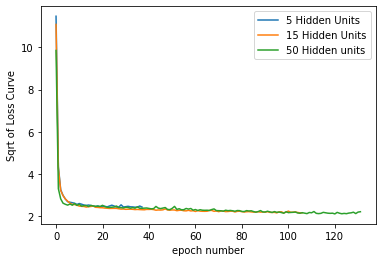

In [6]:
plt.plot(range(0,len(sqrt_reg_a_loss)),sqrt_reg_a_loss,label='5 Hidden Units')
plt.xlabel('epoch number')
plt.ylabel('Sqrt of Loss Curve')


plt.plot(range(0,len(sqrt_reg_b_loss)),sqrt_reg_b_loss,label='15 Hidden Units')
plt.xlabel('epoch number')
plt.ylabel('Sqrt of Loss Curve')


plt.plot(range(0,len(sqrt_reg_c_loss)),sqrt_reg_c_loss,label='50 Hidden units')
plt.xlabel('epoch number')
plt.ylabel('Sqrt of Loss Curve')
plt.legend()
plt.show()



In [7]:
reg_3a= MLPRegressor(hidden_layer_sizes=(15,),activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 1,       learning_rate_init = 0.005).fit(X_train,y_train)
predicted_3a=reg_3a.predict(X_test)
print("1 batch RMSE:",mean_squared_error(y_test,predicted_3a))

reg_3b= MLPRegressor(hidden_layer_sizes=(15,),activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005).fit(X_train,y_train)
predicted_3b=reg_3b.predict(X_test)
print("20 batch RMSE:",mean_squared_error(y_test,predicted_3b))

reg_3c= MLPRegressor(hidden_layer_sizes=(15,),activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 2000,       learning_rate_init = 0.005).fit(X_train,y_train)
predicted_3c=reg_3c.predict(X_test)
print("2000 batch RMSE:",mean_squared_error(y_test,predicted_3c))

1 batch RMSE: 29.325013154285152
20 batch RMSE: 20.718033824792716
2000 batch RMSE: 32.71924916192704


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:352: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


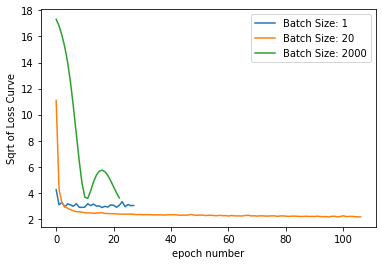

In [8]:
sqrt_reg_3a_loss=[]
for i in reg_3a.loss_curve_:
    sqrt_reg_3a_loss.append(math.sqrt(i))
    
sqrt_reg_3b_loss=[]
for i in reg_3b.loss_curve_:
    sqrt_reg_3b_loss.append(math.sqrt(i))

sqrt_reg_3c_loss=[]
for i in reg_3c.loss_curve_:
    sqrt_reg_3c_loss.append(math.sqrt(i))


plt.plot(range(0,len(sqrt_reg_3a_loss)),sqrt_reg_3a_loss,label='Batch Size: 1')
plt.xlabel('epoch number')
plt.ylabel('Sqrt of Loss Curve')


plt.plot(range(0,len(sqrt_reg_3b_loss)),sqrt_reg_3b_loss,label='Batch Size: 20')
plt.xlabel('epoch number')
plt.ylabel('Sqrt of Loss Curve')


plt.plot(range(0,len(sqrt_reg_3c_loss)),sqrt_reg_3c_loss,label='Batch Size: 2000')
plt.xlabel('epoch number')
plt.ylabel('Sqrt of Loss Curve')
plt.legend()
plt.show()


All of the models minimize sqrt of loss at approximately 10 epochs (or in the case of batch size 20 get very close to it). With a batch size of 1, the model is nearly optimal (for the given batch size) on the training set right away because it is doing "learning" starting at data point and iterates through for every epoch. That being said, it is definitely catching noise and overfitting. With a batch size of 2000, the model performs the worst because the learning is being done with the entire dataset at once. The reason for the bounce up is due to oscillation at a suboptimal minimum. Batch size of 20 performs best because it uses enough data per batch not to overfit but not too much to hit a suboptimal minimum.

# Question 2: Tensor Playground 
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? 

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? 

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. 

4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. 

# Answer 2

1)**Tanh:** Train Loss = .186 Test Loss = .215        **Linear:** Train Loss = .498 Test Loss = .507 

The linear activation does not improve the model regardless of the number of epochs because the data is spread in a totally non-linear fashion. A linear function can't mutate to handle a classification problem with groups located diagonal from each other (in a 2D space). The hyperbolic tangent on the other hand quickly captures the nature of the relationship and makes a diagonal band through the middle of the data set to capture blue while the points outside of the boundary are orange (when running this multiple times the dataset slightly changed so the inside vs outside color may have changed but the general process is the same). Beyond 200 epochs, it just makes slight improves to refine the boundaries.

2)**4 Neurons:** Train Loss = .038 Test Loss = .084 **8 Neurons:** Train Loss = .006 Test Loss = .024

As the number of neurons increased, the boundary morphed into more of an hourglass shape that created 1 continous grouping for orange and 2 distinct grouping for blue on the outside of the hourglass. With the 4 neuron network, there is a section of blue that erroneously impedes on orange where there are no data points. The additional neurons effectively add more slices to the network that prevent this issue.

3)**Learning Rate 10** *100 Epochs:* Train Loss = .765 Test Loss = .792  *1000 Epochs* Train Loss = .791 Test Loss = .822          
**Learning Rate .1** *100 Epochs* Train Loss = .01 Test Loss = .021 *1000 Epochs* Train Loss = .000 Test Loss = .014    
**Learning Rate .01** *100 Epochs* Train Loss = .097 Test Loss = .121 *1000 Epochs* Train Loss = .013 Test Loss = .017  
**Learning Rate .001** *100 Epochs* Train Loss = .353 Test Loss = .360 *1000 Epochs* Train Loss = .090 Test Loss = .114

The loss curve improved with the additional epochs for all learning rates except 10. Since this is an extremely fast learning rate, it essentially blew past the optimal point quickly and additional epochs can fix this issue. With the slower learning rates, the additional epochs improved the ability to converge on a more optimal solution.

The best model has a learning rate of .1, the slower learning rates potentially reached local minima by converging too slowly. With additional epochs, they may have oscillated to get closer to an optimal solution. The .1 learning rate was the goldilocks number of going slow enough to pick up the pattern of the data but not too slow to settle in a region with a suboptimal local minima.

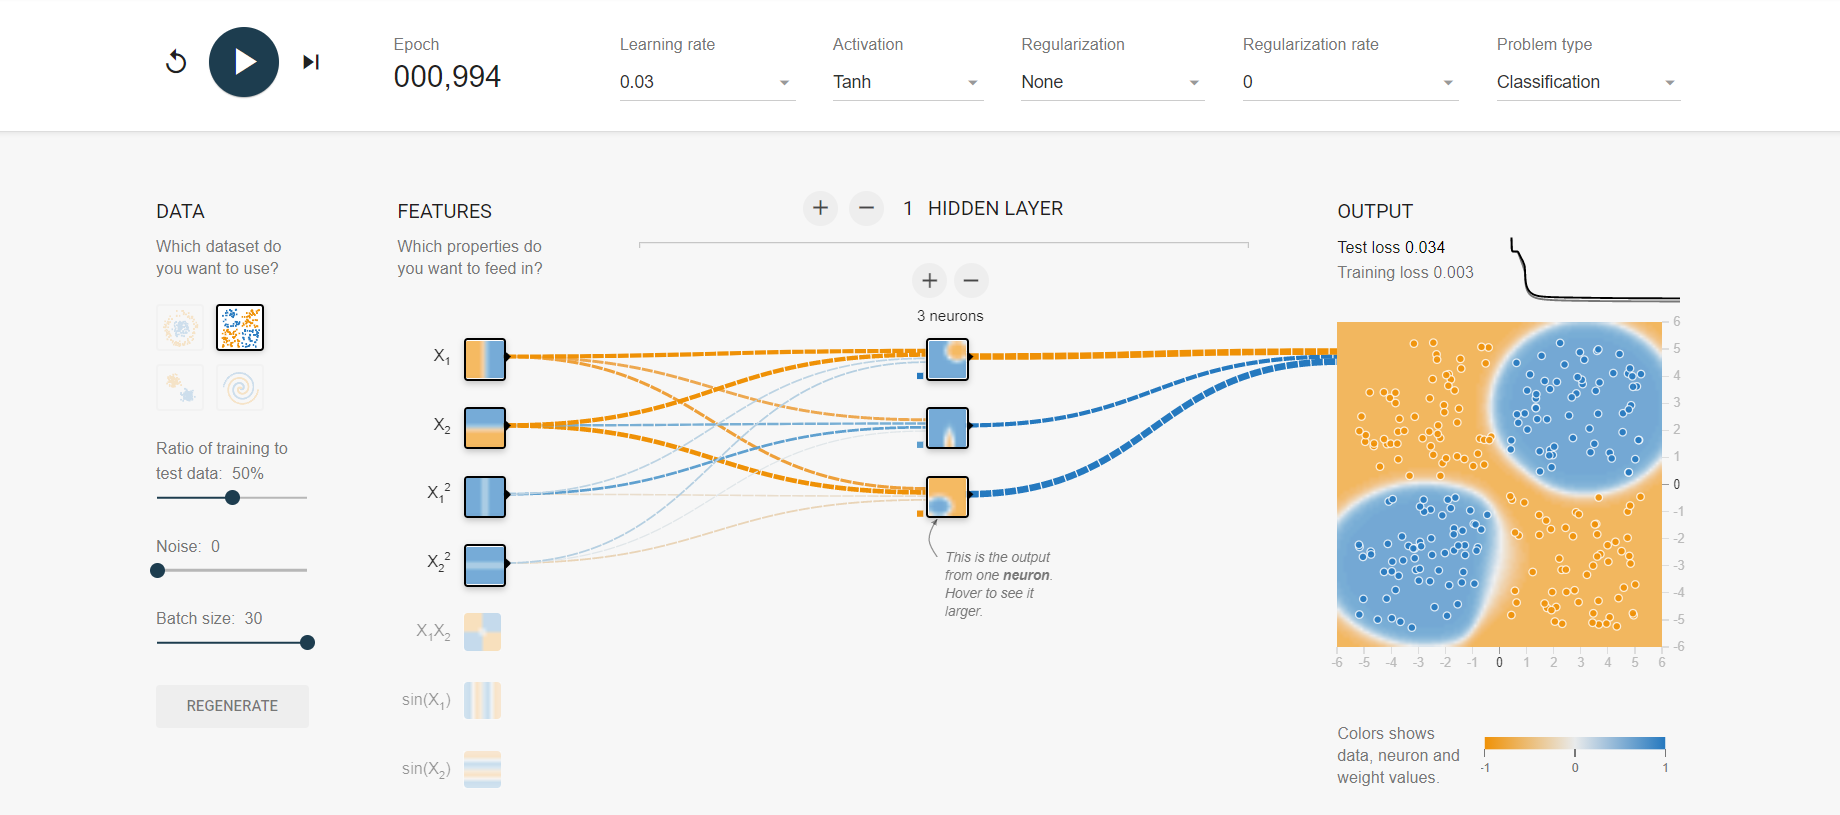

In [9]:
from IPython.display import Image
Image(filename='Q2-4.PNG')

The changes made from the default settings were to add in a third neuron and add 2 features: $X_1^2$ and $X_2^2$. In this case, the batch size seemed appropriate because lowering it caused oscillation and given 1000 epochs it came to a good result. The addition of a third neuron coupled with the 2 squared terms allowed the network to effectively break the data into 4 quadrants which matched the behavior of the data points. 

# Question 3 - Feature Selection 

In this question, we will explore the importance of feature selection, You can use the below code to load the dataset "zoo.csv". This dataset contains a set of features for different animals and the output is class_type 
corresponding to the features. The details of class_type is present in class.csv for your reference.

1. Plot the correlation matrix. The resulting correlation plot should be (n_features * n_features) matrix. List the top 5 most positively correlated features with class_type. 

2. List the top 5 most negatively correlated features with class_type. 

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000) estimator. List the top 5 features selected from RFE.(**2pts**)

* Create a train_test split of 80:20(train:test) with random state = 50

* We need to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

4. Train a MLP Regressor with train data and report the ${R^2}$ score on the test set for each of the following, 

   a) Model trained with top 5 most positvely correlated features from part 1
   
   b) Model trained with top 5 most negatively correlated features from part 2
   
   c) Model trained with five features selected by RFE from part 3
   
   d) Finally train a MLP Regressor on the entire training data with the entire orignal features.Use the default values for MLPRegressor as below

    MLPRegressor(max_iter = 1000,random_state=1)

5. Explain your results based on your understanding of feature selection and the ${R^2}$ score.   

In [10]:
df = pd.read_csv("zoo.csv")
df.columns
y = df['class_type'].values
X = df.drop(['class_type','animal_name'], axis = 1)

class_df = pd.read_csv("class.csv")

# Answer 3

In [11]:
df_2=df

df_2['class_type']=df_2['class_type'].replace([1,2,3,4,5],1)
df_2['class_type']=df_2['class_type'].replace([6,7],0)
df_2
new_y=df_2['class_type']
new_y

0      1
1      1
2      1
3      1
4      1
      ..
96     1
97     0
98     1
99     0
100    1
Name: class_type, Length: 101, dtype: int64

In [12]:
df_2.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,0.191681
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,0.231403
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,-0.340420
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,0.384958
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,-0.104718
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.022463
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.051022
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,0.575085
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,1.000000
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,0.207666


In [13]:
most_positive=X.corrwith(new_y,axis=0).sort_values(ascending=False)[:5]
most_positive

backbone    1.000000
tail        0.731762
toothed     0.575085
milk        0.384958
catsize     0.356976
dtype: float64

In [14]:
most_negative=X.corrwith(new_y,axis=0).sort_values(ascending=True)[:5]
most_negative

legs       -0.432856
eggs       -0.340420
venomous   -0.246611
airborne   -0.104718
aquatic     0.022463
dtype: float64

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(max_iter=1000) 
selector= RFE(estimator,n_features_to_select=5)
selector=selector.fit(X,y)
selector.ranking_

var_list=[]
for i in range(1,len(selector.ranking_)):
    if selector.ranking_[i] == 1:
        var_list.append(i)
var_list[1]
most_important=list(X.iloc[:, var_list].columns)
most_important

['feathers', 'milk', 'toothed', 'backbone', 'tail']

In [16]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.20, random_state = 50)
X_train_3a, X_test_3a, y_train_3a, y_test_3a = train_test_split(X[most_positive.index], y, test_size=0.20, random_state = 50)
X_train_3b, X_test_3b, y_train_3b, y_test_3b = train_test_split(X[most_negative.index], y, test_size=0.20, random_state = 50)
X_train_3c, X_test_3c, y_train_3c, y_test_3c = train_test_split(X[most_important], y, test_size=0.20, random_state = 50)


In [17]:
X_scaler_3 = StandardScaler()
X_train_3 = X_scaler_3.fit_transform(X_train_3)
X_test_3 = X_scaler_3.transform(X_test_3)

X_scaler_3a = StandardScaler()
X_train_3a = X_scaler_3a.fit_transform(X_train_3a)
X_test_3a = X_scaler_3a.transform(X_test_3a)

X_scaler_3b = StandardScaler()
X_train_3b = X_scaler_3b.fit_transform(X_train_3b)
X_test_3b = X_scaler_3b.transform(X_test_3b)

X_scaler_3c = StandardScaler()
X_train_3c = X_scaler_3c.fit_transform(X_train_3c)
X_test_3c = X_scaler_3c.transform(X_test_3c)

In [18]:
from sklearn.metrics import r2_score

reg_3_4a=MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_3a,y_train_3a)
predicted_3_4a=reg_3_4a.predict(X_test_3a)
print("Most Positive R^2:",r2_score(y_test_3a,predicted_3_4a))

reg_3_4b=MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_3b,y_train_3b)
predicted_3_4b=reg_3_4b.predict(X_test_3b)
print("Most Negative R^2:",r2_score(y_test_3b,predicted_3_4b))

reg_3_4c=MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_3c,y_train_3c)
predicted_3_4c=reg_3_4c.predict(X_test_3c)
print("Most Important R^2:",r2_score(y_test_3c,predicted_3_4c))


reg_3_4d=MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_3,y_train_3)
predicted_3_4d=reg_3_4d.predict(X_test_3)
print("Full train R^2:",r2_score(y_test_3,predicted_3_4d))

Most Positive R^2: 0.9328208871876462
Most Negative R^2: 0.7875978696635864
Most Important R^2: 0.9986151075637504
Full train R^2: 0.9506742986075811


The best performing model was with the most important factors from RFE. This makes sense as the highest predictors of y were used in this model. The worst model was the most negative impact, partially because there was 1 positive coefficient variable in here that may have dampened explanatory power. The most positive model performs well but worse than the full training set because it is missing the balanced explanation of positive and negative variables needed in classification.

# Question 4 (Data Pre-processing)
The following dataset contains House Sales data in King County, USA. This dataset contains house sale prices for King County, which includes Seattle. This dataset contains the following columns:

* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront (0/1)
* view: Has been viewed (0-4)
* condition: How good the condition is Overall (1-5)
* grade: Overall grade given to the housing unit, based on King County grading system (1-13)
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: Zip code
* price: Selling price of house

Here, price is the dependent variable while all other variables are assumed to be independent variables. Here, 10% cells of most columns in the dataset contain NaN value.

In [19]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(100)

df = pd.read_csv("kc_house_data.csv")
age = df['yr_renovated']
built = df['yr_built']
df.iloc[:, :-1] = df[:-1].mask(np.random.random(df[:-1].shape)<0.1)
df['yr_renovated'] = age
df['yr_built'] = built
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,0,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,0,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0,98074.0,510000.0


### Question 4.1 
Print the number of NaN values in each column. Next, if the value of `yr_renovated` is equal to 0, set it equal to the corresponding value of `yr_built`.

In [20]:
missing = df.isnull().sum().sort_values(ascending=False)
missing

sqft_basement    2198
view             2184
waterfront       2179
sqft_living      2170
zipcode          2169
sqft_above       2163
floors           2152
bathrooms        2150
bedrooms         2150
grade            2135
condition        2096
sqft_lot         2091
price               0
yr_renovated        0
yr_built            0
dtype: int64

In [21]:
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0


### Question 4.2 

Create a copy of `df` named `df_dm` and create a new column in `df_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use [pandas.cut()](https://stackoverflow.com/a/31740881) and modify its paramter list as below:
- `bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]`
- `labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']`
- `include_lowest=True`

Next, perform one-hot encoding using this new column.

In [22]:
df_dm = df.copy()

df_dm['binned_yr_built'] = pd.cut(df_dm['yr_built'], 
                                  bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020],
                                  labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],
                                  include_lowest=True)

binned_yrs = pd.get_dummies(df_dm['binned_yr_built'])
df_dm = df_dm.join(binned_yrs)
df_dm.drop(['binned_yr_built'],axis=1,inplace=True)
df_dm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,price,1900-1920,1920-1940,1940-1960,1960-1980,1980-2000,2000-2020
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,...,1955,1955,98178.0,221900.0,0,0,1,0,0,0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,...,1951,1991,98125.0,538000.0,0,0,1,0,0,0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,...,1933,1933,NaN,180000.0,0,1,0,0,0,0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,...,1965,1965,NaN,604000.0,0,0,0,1,0,0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,...,1987,1987,98074.0,510000.0,0,0,0,0,1,0


## Question 4.3 
Create a copy of `df` named `temp_df`. Drop all rows in `temp_df` that contain any null value and run a linear regression model using a train-test split with `test_size=0.3` and `random_state=42`.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

temp_df = df_dm.copy()
temp_df.dropna(inplace=True)
y = temp_df['price']
X = temp_df.drop(['price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

print('R^2:', str(r2_score(y_test, y_preds)))

R^2: 0.6778492935292322


## Question 4.4 

Use `df` to create a train/test split with `test_size=0.30` and `random_state=42`. Use the following imputation methods to fill in all NaN values for the obtained training set.
- mean (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- median (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- most_frequent (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- k-Nearest Neighbors (using [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)) - Run this four times with the value of `n_neighbors` = 2, 5, 10 and 20.

For each method, impute the test set with the same imputer and print the test $R^2$ score obtained using a linear regression model. Which method gives the best result? What can you say from the result of a) SimpleImputer and b) KNNImputer?

In [25]:
from sklearn.impute import SimpleImputer, KNNImputer
df_mean = df_dm.copy()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_mean = pd.DataFrame(imp_mean.fit_transform(df_mean))
df_mean.columns=df_dm.columns
df_mean.index=df_dm.index

In [26]:
%%time
from sklearn.impute import SimpleImputer, KNNImputer

df_mean = df_dm.copy()
df_median = df_dm.copy()
df_most_freq = df_dm.copy()
df_knn2 = df_dm.copy()
df_knn5 = df_dm.copy()
df_knn10 = df_dm.copy()
df_knn20 = df_dm.copy()

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_knn2 = KNNImputer(n_neighbors=2)
imp_knn5 = KNNImputer(n_neighbors=5)
imp_knn10 = KNNImputer(n_neighbors=10)
imp_knn20 = KNNImputer(n_neighbors=20)

df_mean = pd.DataFrame(imp_mean.fit_transform(df_mean))
df_mean.columns=df_dm.columns
df_mean.index=df_dm.index

df_median = pd.DataFrame(imp_median.fit_transform(df_median))
df_median.columns=df_dm.columns
df_median.index=df_dm.index

df_most_freq = pd.DataFrame(imp_most_freq.fit_transform(df_most_freq))
df_most_freq.columns=df_dm.columns
df_most_freq.index=df_dm.index

df_knn2 = pd.DataFrame(imp_knn2.fit_transform(df_knn2))
df_knn2.columns=df_dm.columns
df_knn2.index=df_dm.index

df_knn5 = pd.DataFrame(imp_knn5.fit_transform(df_knn5))
df_knn5.columns=df_dm.columns
df_knn5.index=df_dm.index

df_knn10 = pd.DataFrame(imp_knn10.fit_transform(df_knn10))
df_knn10.columns=df_dm.columns
df_knn10.index=df_dm.index

df_knn20 = pd.DataFrame(imp_knn20.fit_transform(df_knn20))
df_knn20.columns=df_dm.columns
df_knn20.index=df_dm.index

Wall time: 1min 52s


In [27]:
y = df_dm['price']

X = df_mean.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
print('r2 score (mean):', str(r2_score(y_test, y_preds)))
df_mean = imp_mean.fit_transform(df_mean)

X = df_median.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
print('r2 score (median):', str(r2_score(y_test, y_preds)))

X = df_most_freq.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
print('r2 score (most_freq):', str(r2_score(y_test, y_preds)))

X = df_knn2.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
print('r2 score (knn=2):', str(r2_score(y_test, y_preds)))

X = df_knn5.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
print('r2 score (knn=5):', str(r2_score(y_test, y_preds)))

X = df_knn10.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
print('r2 score (knn=10):', str(r2_score(y_test, y_preds)))

X = df_knn20.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
print('r2 score (knn=20):', str(r2_score(y_test, y_preds)))

r2 score (mean): 0.6348206003709902
r2 score (median): 0.6288061884333146
r2 score (most_freq): 0.6232240111534973
r2 score (knn=2): 0.6749593349330528
r2 score (knn=5): 0.6795282960052316
r2 score (knn=10): 0.6828058790855154
r2 score (knn=20): 0.6836761835405977


The imputing with KNN = 20 had the best result. We can say that KNNImputer performs performs substantially better than SimpleImputer on this data.

## Question 4.5 
In Questions 4.3 and 4.4, when you dropped all rows containing any null value, you obtained better $R^2$ score than when you imputed the missing values. What can be some possible reasons behind this?

Some possible reasons would be:
1. The imputed values are not completely accurate and thus bias the dataset.
2. After imputing values, the distribution of the training data does not accurately match the test data distribution.
3. Data that was collected without missing values are in some way more accurately reported. 